In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.impute import SimpleImputer

from sklearn.metrics import mean_squared_error

In [332]:
df=pd.read_csv('/Users/pratiksha/Downloads/Data Files/kc_house_data.csv')

In [333]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [334]:
df.shape

(21613, 21)

In [335]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [337]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [338]:
# Cheking for duplicated rows
duplicates = df[df.duplicated()]
print(len(duplicates))

0


In [339]:
# Cheking for rows with same id
duplicates = df[df.duplicated(subset=['id'])]
print(len(duplicates))


177


In [340]:
# convert to datetime
df['date'] = pd.to_datetime(df['date'])

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [342]:
df['floors'] = df['floors'].astype(int)
print(df)
df.info()

               id       date     price  bedrooms  bathrooms  sqft_living   
0      7129300520 2014-10-13  221900.0         3       1.00         1180  \
1      6414100192 2014-12-09  538000.0         3       2.25         2570   
2      5631500400 2015-02-25  180000.0         2       1.00          770   
3      2487200875 2014-12-09  604000.0         4       3.00         1960   
4      1954400510 2015-02-18  510000.0         3       2.00         1680   
...           ...        ...       ...       ...        ...          ...   
21608   263000018 2014-05-21  360000.0         3       2.50         1530   
21609  6600060120 2015-02-23  400000.0         4       2.50         2310   
21610  1523300141 2014-06-23  402101.0         2       0.75         1020   
21611   291310100 2015-01-16  400000.0         3       2.50         1600   
21612  1523300157 2014-10-15  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above   
0          5650   

In [343]:
num_houses_with_zero_bedrooms = len(df[df['bedrooms'] == 0])
print(f"The number of houses with 0 bedrooms: {num_houses_with_zero_bedrooms}")

The number of houses with 0 bedrooms: 13


In [344]:
num_houses_with_zero_bathrooms = len(df[df['bathrooms'] == 0])
print(f"The number of houses with 0 bathrooms: {num_houses_with_zero_bathrooms}")

The number of houses with 0 bathrooms: 10


In [345]:
null_values = df.isnull().sum()
print(null_values)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [346]:
df = df.drop(df.columns[0], axis=1)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000.0,3,2.50,1530,1131,3,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,2015-02-23,400000.0,4,2.50,2310,5813,2,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2014-06-23,402101.0,2,0.75,1020,1350,2,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,2015-01-16,400000.0,3,2.50,1600,2388,2,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


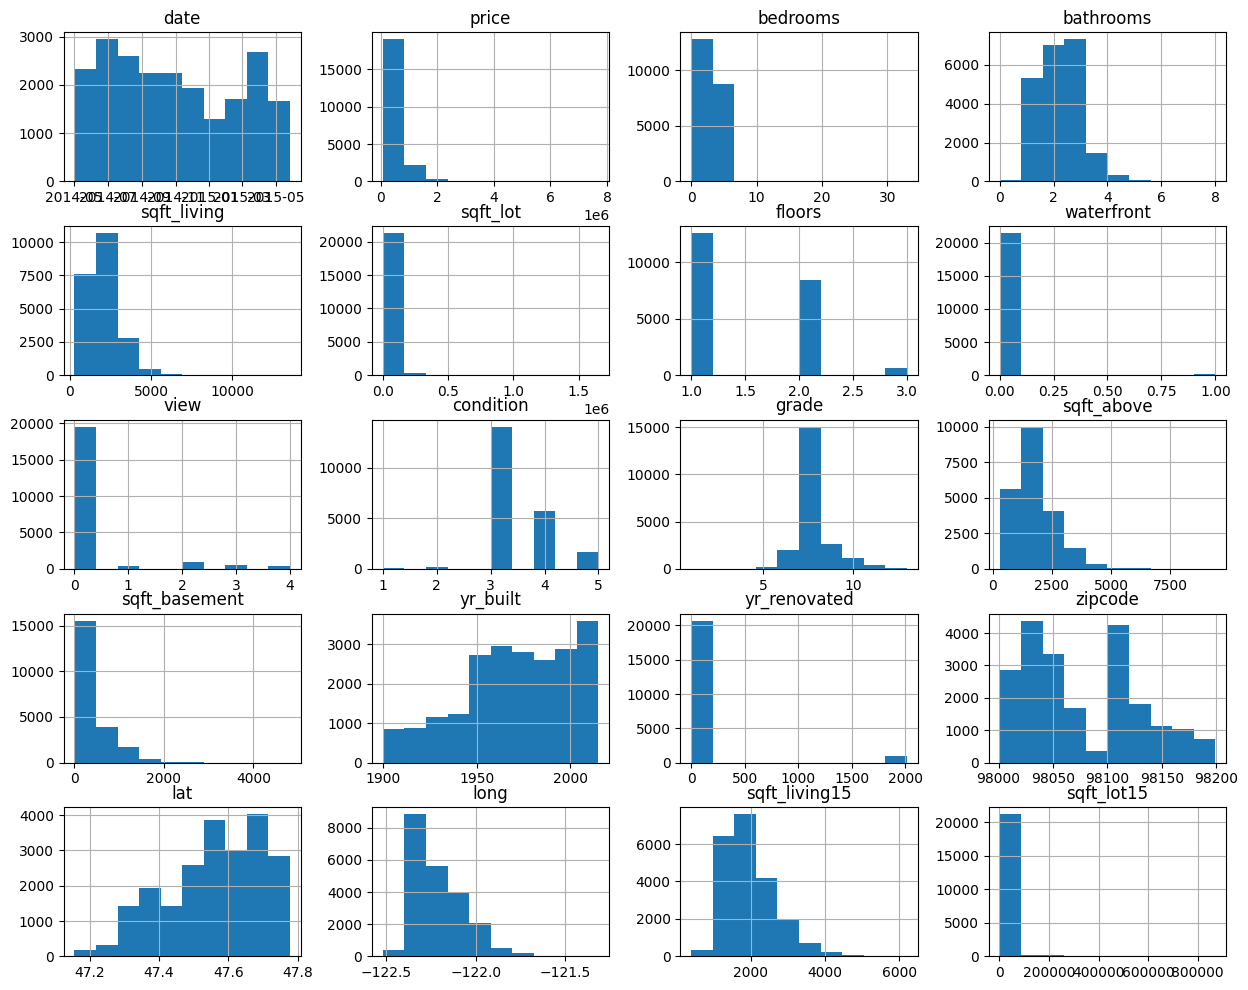

In [347]:
df.hist(figsize = (15,12))
plt.show()

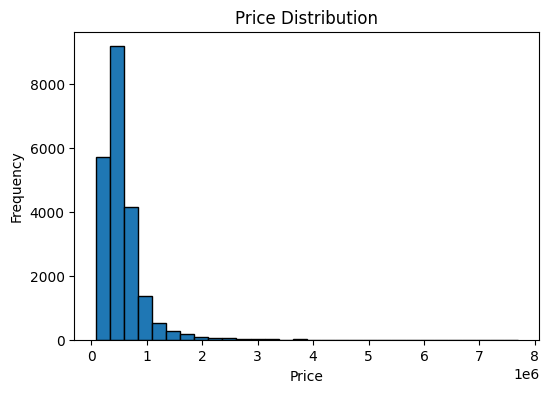

In [348]:
# Plotting the histogram of the price column
plt.figure(figsize=(6, 4))
plt.hist(df['price'], bins=30, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

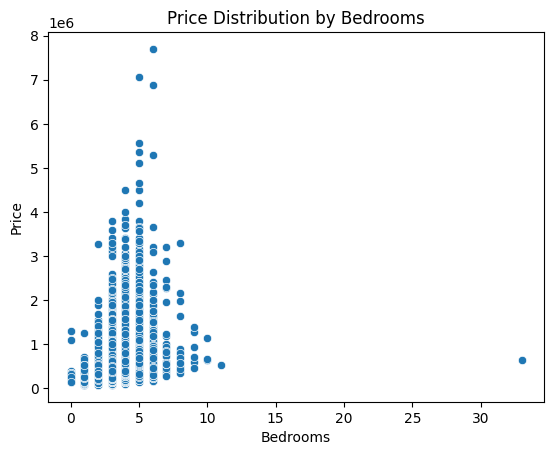

In [349]:
sns.scatterplot(data = df,x='bedrooms', y='price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Price Distribution by Bedrooms')

plt.show()

# 33 bedrooms is an outlier

In [350]:
# Investigate bedrooms
df['bedrooms'].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [351]:
df[(df['bedrooms'] > 9)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8757,2014-08-21,520000.0,11,3.00,3000,4960,2,0,0,3,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
13314,2014-08-14,1148000.0,10,5.25,4590,10920,1,0,2,3,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
15161,2014-10-29,650000.0,10,2.00,3610,11914,2,0,0,4,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914
15870,2014-06-25,640000.0,33,1.75,1620,6000,1,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700
19254,2014-12-29,660000.0,10,3.00,2920,3745,2,0,0,4,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745


In [352]:
df.drop(8757, axis=0,inplace=True)

In [353]:
df.drop(13314, axis=0,inplace=True)
df.drop(15161, axis=0,inplace=True)
df.drop(15870, axis=0,inplace=True)
df.drop(19254, axis=0,inplace=True)

In [354]:
df[(df['bedrooms'] > 9)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


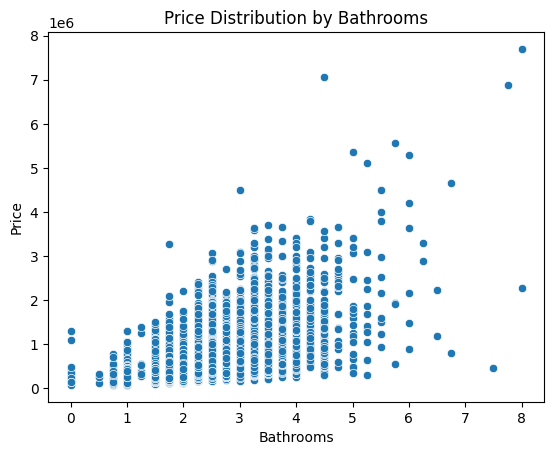

In [355]:
# Create a box plot
sns.scatterplot(data = df,x='bathrooms', y='price')
# Set labels and title
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.title('Price Distribution by Bathrooms')

# Display the plot
plt.show()

#check for the house with  bathrooms and then see whats the grade

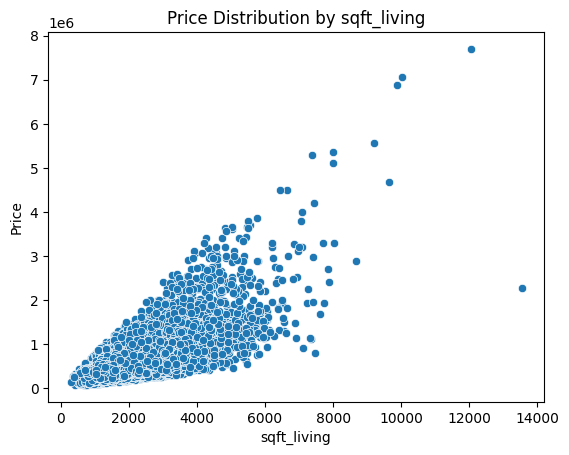

In [356]:
# Create a box plot
sns.scatterplot(data = df,x='sqft_living', y='price')
# Set labels and title
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.title('Price Distribution by sqft_living')

# Display the plot
plt.show()

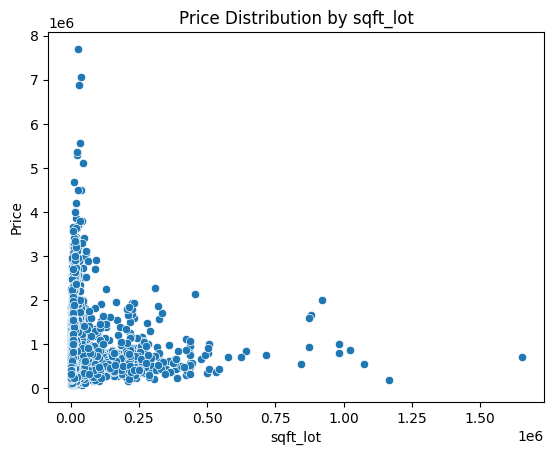

In [357]:
# Create a box plot
sns.scatterplot(data = df,x='sqft_lot', y='price')
# Set labels and title
plt.xlabel('sqft_lot')
plt.ylabel('Price')
plt.title('Price Distribution by sqft_lot')

# Display the plot
plt.show()

# check for the oulier, compare the zipcode, see for similar zipcode values.

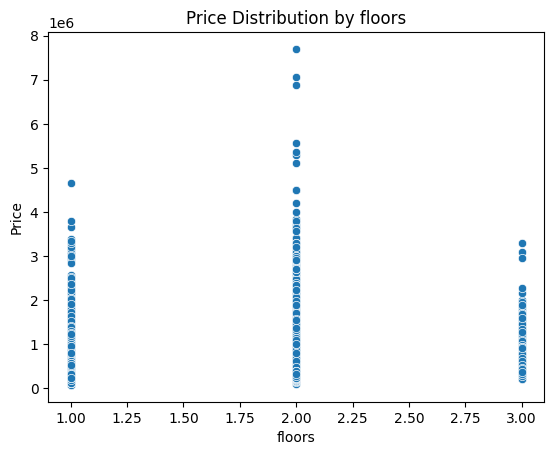

In [358]:
# Create a box plot
sns.scatterplot(data = df,x='floors', y='price')
# Set labels and title
plt.xlabel('floors')
plt.ylabel('Price')
plt.title('Price Distribution by floors')

# Display the plot
plt.show()

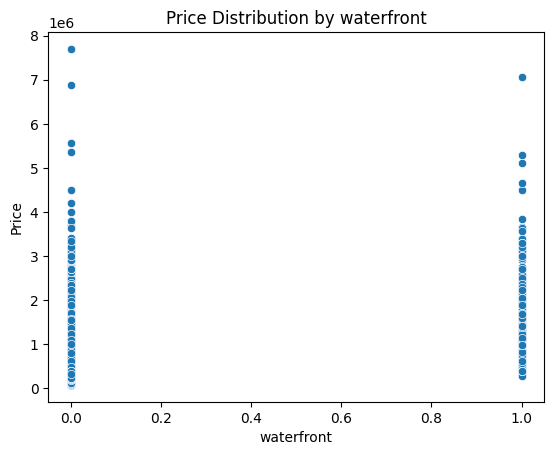

In [359]:
# Create a box plot
sns.scatterplot(data = df,x='waterfront', y='price')
# Set labels and title
plt.xlabel('waterfront')
plt.ylabel('Price')
plt.title('Price Distribution by waterfront')

# Display the plot
plt.show()

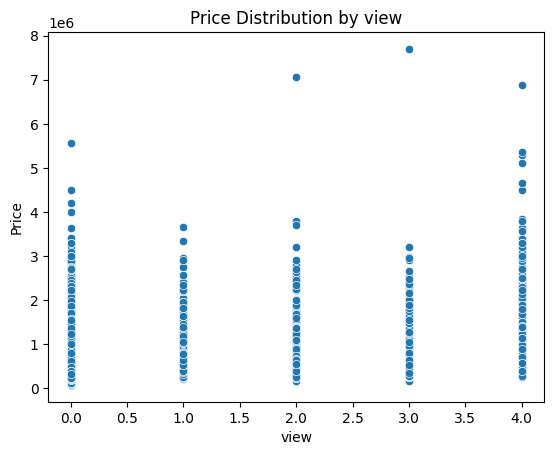

In [360]:
# Create a box plot
sns.scatterplot(data = df,x='view', y='price')
# Set labels and title
plt.xlabel('view')
plt.ylabel('Price')
plt.title('Price Distribution by view')

# Display the plot
plt.show()


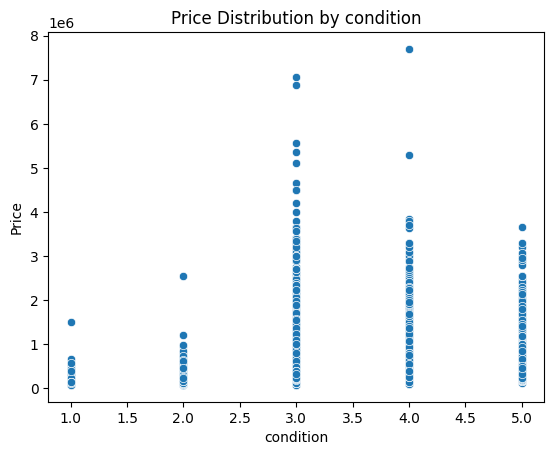

In [361]:
# Create a box plot
sns.scatterplot(data = df,x='condition', y='price')
# Set labels and title
plt.xlabel('condition')
plt.ylabel('Price')
plt.title('Price Distribution by condition')

# Display the plot
plt.show()

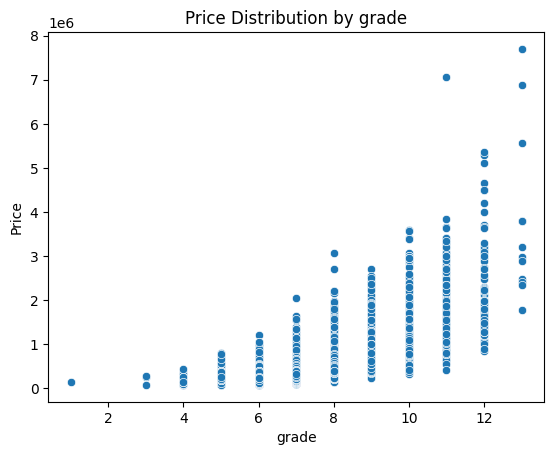

In [362]:
# Create a box plot
sns.scatterplot(data = df,x='grade', y='price')
# Set labels and title
plt.xlabel('grade')
plt.ylabel('Price')
plt.title('Price Distribution by grade')

# Display the plot
plt.show()

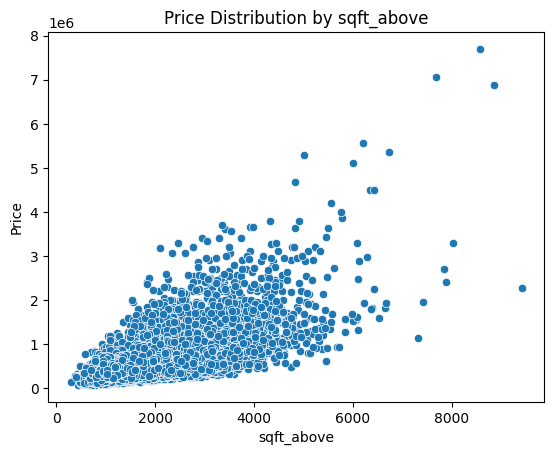

In [363]:
# Create a box plot
sns.scatterplot(data = df,x='sqft_above', y='price')
# Set labels and title
plt.xlabel('sqft_above')
plt.ylabel('Price')
plt.title('Price Distribution by sqft_above')

# Display the plot
plt.show()

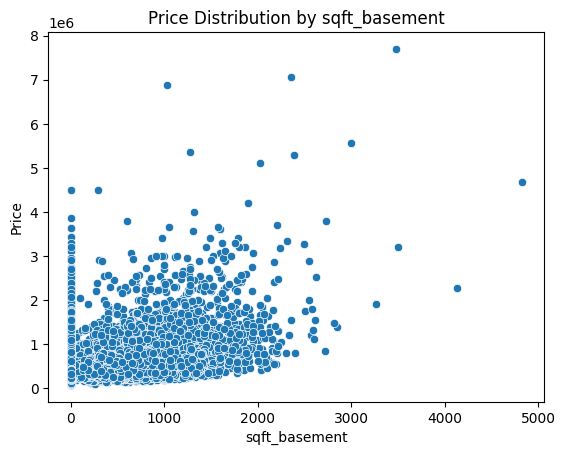

In [364]:
# Create a box plot
sns.scatterplot(data = df,x='sqft_basement', y='price')
# Set labels and title
plt.xlabel('sqft_basement')
plt.ylabel('Price')
plt.title('Price Distribution by sqft_basement')

# Display the plot
plt.show()

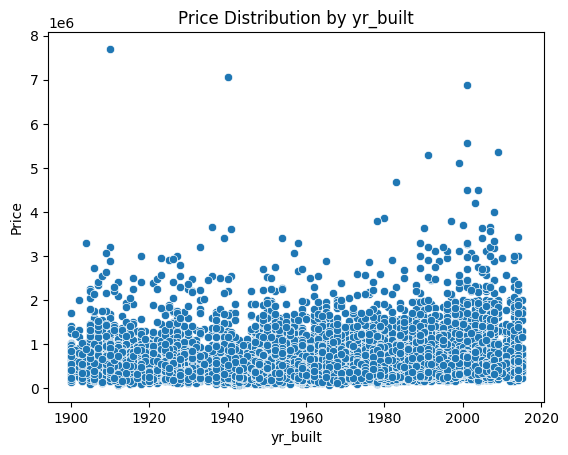

In [365]:
# Create a box plot
sns.scatterplot(data = df,x='yr_built', y='price')
# Set labels and title
plt.xlabel('yr_built')
plt.ylabel('Price')
plt.title('Price Distribution by yr_built')

# Display the plot
plt.show()

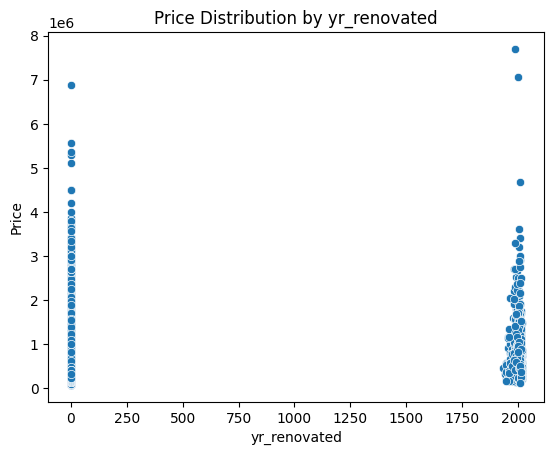

In [366]:
# Create a box plot
sns.scatterplot(data = df,x='yr_renovated', y='price')
# Set labels and title
plt.xlabel('yr_renovated')
plt.ylabel('Price')
plt.title('Price Distribution by yr_renovated')

# Display the plot
plt.show()

<Axes: >

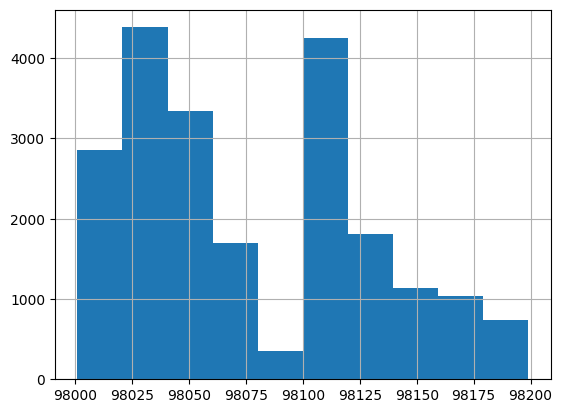

In [367]:
df["zipcode"].hist()

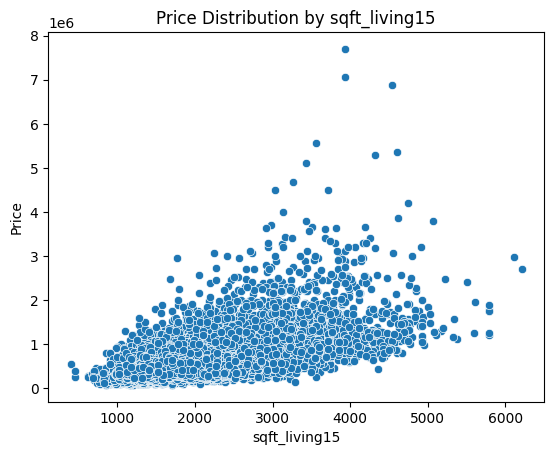

In [368]:
# Create a box plot
sns.scatterplot(data = df,x='sqft_living15', y='price')
# Set labels and title
plt.xlabel('sqft_living15')
plt.ylabel('Price')
plt.title('Price Distribution by sqft_living15')

# Display the plot
plt.show()

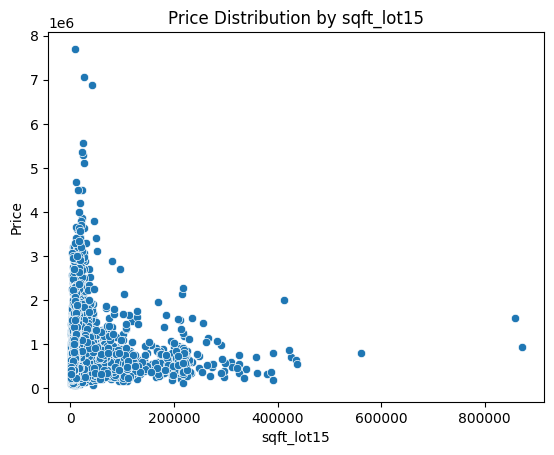

In [369]:
# Create a box plot
sns.scatterplot(data = df,x='sqft_lot15', y='price')
# Set labels and title
plt.xlabel('sqft_lot15')
plt.ylabel('Price')
plt.title('Price Distribution by sqft_lot15')

# Display the plot
plt.show()

<Axes: xlabel='lat', ylabel='long'>

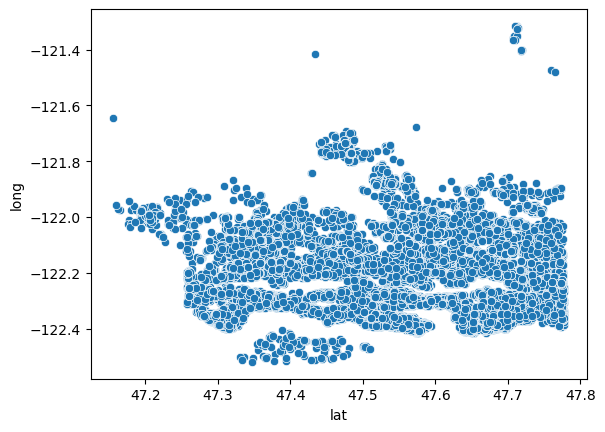

In [370]:
#use scatterplot to see if there is any outlier or missing values for longtitude and latitude
sns.scatterplot(data = df, x = "lat", y = "long")

In [371]:

df[(df['price'] > 6000000)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3914,2014-06-11,7062500.0,5,4.50,10040,37325,2,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
7252,2014-10-13,7700000.0,6,8.00,12050,27600,2,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
9254,2014-09-19,6885000.0,6,7.75,9890,31374,2,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730


In [372]:
df.drop(3914, axis=0,inplace=True)
df.drop(7252, axis=0,inplace=True)
df.drop(9254, axis=0,inplace=True)

In [373]:
df[(df['price'] > 6000000)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [374]:
df['area'] = df['sqft_living'] / df['price']
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,area
0,2014-10-13,221900.0,3,1.00,1180,5650,1,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0.005318
1,2014-12-09,538000.0,3,2.25,2570,7242,2,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0.004777
2,2015-02-25,180000.0,2,1.00,770,10000,1,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0.004278
3,2014-12-09,604000.0,4,3.00,1960,5000,1,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0.003245
4,2015-02-18,510000.0,3,2.00,1680,8080,1,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0.003294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000.0,3,2.50,1530,1131,3,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,0.004250
21609,2015-02-23,400000.0,4,2.50,2310,5813,2,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,0.005775
21610,2014-06-23,402101.0,2,0.75,1020,1350,2,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,0.002537
21611,2015-01-16,400000.0,3,2.50,1600,2388,2,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,0.004000


In [375]:
df['month sold'] = df['date'].dt.month
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,area,month sold
0,2014-10-13,221900.0,3,1.00,1180,5650,1,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,0.005318,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,0.004777,12
2,2015-02-25,180000.0,2,1.00,770,10000,1,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,0.004278,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,0.003245,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,0.003294,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000.0,3,2.50,1530,1131,3,0,0,3,...,0,2009,0,98103,47.6993,-122.346,1530,1509,0.004250,5
21609,2015-02-23,400000.0,4,2.50,2310,5813,2,0,0,3,...,0,2014,0,98146,47.5107,-122.362,1830,7200,0.005775,2
21610,2014-06-23,402101.0,2,0.75,1020,1350,2,0,0,3,...,0,2009,0,98144,47.5944,-122.299,1020,2007,0.002537,6
21611,2015-01-16,400000.0,3,2.50,1600,2388,2,0,0,3,...,0,2004,0,98027,47.5345,-122.069,1410,1287,0.004000,1


In [376]:
df['age_of_house'] = 2015 - df['yr_built']
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,area,month sold,age_of_house
0,2014-10-13,221900.0,3,1.00,1180,5650,1,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,0.005318,10,60
1,2014-12-09,538000.0,3,2.25,2570,7242,2,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,0.004777,12,64
2,2015-02-25,180000.0,2,1.00,770,10000,1,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,0.004278,2,82
3,2014-12-09,604000.0,4,3.00,1960,5000,1,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,0.003245,12,50
4,2015-02-18,510000.0,3,2.00,1680,8080,1,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,0.003294,2,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000.0,3,2.50,1530,1131,3,0,0,3,...,2009,0,98103,47.6993,-122.346,1530,1509,0.004250,5,6
21609,2015-02-23,400000.0,4,2.50,2310,5813,2,0,0,3,...,2014,0,98146,47.5107,-122.362,1830,7200,0.005775,2,1
21610,2014-06-23,402101.0,2,0.75,1020,1350,2,0,0,3,...,2009,0,98144,47.5944,-122.299,1020,2007,0.002537,6,6
21611,2015-01-16,400000.0,3,2.50,1600,2388,2,0,0,3,...,2004,0,98027,47.5345,-122.069,1410,1287,0.004000,1,11


In [377]:
df['year_sold'] = df['date'].dt.year
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,area,month sold,age_of_house,year_sold
0,2014-10-13,221900.0,3,1.00,1180,5650,1,0,0,3,...,0,98178,47.5112,-122.257,1340,5650,0.005318,10,60,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2,0,0,3,...,1991,98125,47.7210,-122.319,1690,7639,0.004777,12,64,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1,0,0,3,...,0,98028,47.7379,-122.233,2720,8062,0.004278,2,82,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1,0,0,5,...,0,98136,47.5208,-122.393,1360,5000,0.003245,12,50,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1,0,0,3,...,0,98074,47.6168,-122.045,1800,7503,0.003294,2,28,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000.0,3,2.50,1530,1131,3,0,0,3,...,0,98103,47.6993,-122.346,1530,1509,0.004250,5,6,2014
21609,2015-02-23,400000.0,4,2.50,2310,5813,2,0,0,3,...,0,98146,47.5107,-122.362,1830,7200,0.005775,2,1,2015
21610,2014-06-23,402101.0,2,0.75,1020,1350,2,0,0,3,...,0,98144,47.5944,-122.299,1020,2007,0.002537,6,6,2014
21611,2015-01-16,400000.0,3,2.50,1600,2388,2,0,0,3,...,0,98027,47.5345,-122.069,1410,1287,0.004000,1,11,2015


In [378]:
df['renovated'] = (df['yr_renovated'] > 0).astype(int)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,area,month sold,age_of_house,year_sold,renovated
0,2014-10-13,221900.0,3,1.00,1180,5650,1,0,0,3,...,98178,47.5112,-122.257,1340,5650,0.005318,10,60,2014,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2,0,0,3,...,98125,47.7210,-122.319,1690,7639,0.004777,12,64,2014,1
2,2015-02-25,180000.0,2,1.00,770,10000,1,0,0,3,...,98028,47.7379,-122.233,2720,8062,0.004278,2,82,2015,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1,0,0,5,...,98136,47.5208,-122.393,1360,5000,0.003245,12,50,2014,0
4,2015-02-18,510000.0,3,2.00,1680,8080,1,0,0,3,...,98074,47.6168,-122.045,1800,7503,0.003294,2,28,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000.0,3,2.50,1530,1131,3,0,0,3,...,98103,47.6993,-122.346,1530,1509,0.004250,5,6,2014,0
21609,2015-02-23,400000.0,4,2.50,2310,5813,2,0,0,3,...,98146,47.5107,-122.362,1830,7200,0.005775,2,1,2015,0
21610,2014-06-23,402101.0,2,0.75,1020,1350,2,0,0,3,...,98144,47.5944,-122.299,1020,2007,0.002537,6,6,2014,0
21611,2015-01-16,400000.0,3,2.50,1600,2388,2,0,0,3,...,98027,47.5345,-122.069,1410,1287,0.004000,1,11,2015,0


In [393]:
z_scores = np.abs((df['price'] - df['price'].mean()) / df['price'].std())
outliers_mask = z_scores > 3
outliers = df[outliers_mask]
print(outliers)

           price  bedrooms  bathrooms  sqft_living  sqft_lot  floors   
1420   1700000.0         4       3.75         3190     17186       2  \
15039  2000000.0         3       3.25         2610     16387       2   
17767  2050000.0         4       3.25         3580     19989       1   
18828  1675000.0         3       2.50         3490      8343       2   
11073  1662000.0         4       2.75         3520     19200       1   
...          ...       ...        ...          ...       ...     ...   
19236  2720000.0         4       3.25         3990     18115       2   
19351  1950000.0         4       3.50         4065     18713       2   
20096  2250000.0         5       5.25         3410      8118       2   
21040  2900000.0         5       4.00         5190     14600       2   
21514  1865000.0         4       3.75         3790      8797       2   

       waterfront  view  condition  grade  ...      lat     long   
1420            1     4          3     10  ...  47.5115 -122.246  \

In [394]:
df = df[~outliers_mask]

In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21188 entries, 0 to 18892
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       21188 non-null  float64
 1   bedrooms                    21188 non-null  int64  
 2   bathrooms                   21188 non-null  float64
 3   sqft_living                 21188 non-null  int64  
 4   sqft_lot                    21188 non-null  int64  
 5   floors                      21188 non-null  int64  
 6   waterfront                  21188 non-null  int64  
 7   view                        21188 non-null  int64  
 8   condition                   21188 non-null  int64  
 9   grade                       21188 non-null  int64  
 10  sqft_above                  21188 non-null  int64  
 11  sqft_basement               21188 non-null  int64  
 12  yr_built                    21188 non-null  int64  
 13  yr_renovated                21188 no

In [399]:
zipcode_average_price_per_sqft = df.groupby('zipcode')['price'].mean() / df.groupby('zipcode')['sqft_living'].mean()
df = df.merge(zipcode_average_price_per_sqft.rename('zipcode_avg_price_per_sqft'), left_on='zipcode', right_index=True)
print(df)

           price  bedrooms  bathrooms  sqft_living  sqft_lot  floors   
0       221900.0         3       1.00         1180      5650       1  \
117     205425.0         2       1.00          880      6780       1   
126     445000.0         3       2.25         2100      8201       1   
273     236000.0         3       1.00         1300      5898       1   
281     170000.0         2       1.00          860      5265       1   
...          ...       ...        ...          ...       ...     ...   
14803  1260000.0         3       2.50         3110      9930       1   
16377  1200000.0         4       3.00         2150      8119       2   
17209  1450000.0         5       2.75         3090     19865       1   
17930  1350000.0         3       2.00         2070      9600       1   
18892  1410000.0         4       2.25         3250     16684       2   

       waterfront  view  condition  grade  ...  sqft_living15  sqft_lot15   
0               0     0          3      7  ...           1

In [379]:
'''df = df.drop(df.columns[0], axis=1)
df'''

'df = df.drop(df.columns[0], axis=1)\ndf'

In [400]:
results = ols("price ~  grade + sqft_living + sqft_living15 + zipcode_avg_price_per_sqft + sqft_above + bathrooms + lat + bedrooms + view + sqft_basement + floors + yr_renovated + waterfront", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     8157.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:26:29   Log-Likelihood:            -2.7577e+05
No. Observations:               21188   AIC:                         5.516e+05
Df Residuals:                   21175   BIC:                         5.517e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [380]:
results = ols("price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + grade + sqft_above + sqft_basement + condition + waterfront + view + zipcode + renovated + age_of_house", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     3147.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:16:46   Log-Likelihood:            -2.9550e+05
No. Observations:               21605   AIC:                         5.910e+05
Df Residuals:                   21591   BIC:                         5.911e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.302e+06   2.95e+06      0.780

In [408]:
categorical_features = ['waterfront', 'view', 'condition', 'grade' ] #first determine categorical features
numerical_features = ['bedrooms', 'bathrooms', 'sqft_living', 'zipcode_avg_price_per_sqft', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode','lat', 'long', 'sqft_living15', 'sqft_lot15' ]
target = 'price'

In [409]:
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features],df[target], test_size = 0.3, random_state=1101)

In [410]:
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps=[('scaler', StandardScaler()), ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean'))])

In [411]:
preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_transformer, categorical_features),
    ('num', num_transformer, numerical_features)
])

In [412]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

linear_regression.fit(X_train, y_train)

linear_pred = linear_regression.predict(X_test)
print(linear_pred)

np.sqrt(mean_squared_error(linear_pred,y_test))

[764416. 486992. 474448. ... 815504. 205840. 380816.]


26021786529655.1

In [413]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0)) #default value will be 1
])

ridge_regression.fit(X_train, y_train)

ridge_pred = ridge_regression.predict(X_test)
print(ridge_pred)

np.sqrt(mean_squared_error(ridge_pred,y_test))

[764243.48505298 486911.40017865 473997.01920508 ... 816018.45330871
 205763.26803794 380773.029264  ]


105547.25118950245

In [414]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=2.0)) #alpha sets how sensitive the model is at removing variables. Higher the more it removes.
])

lasso_regression.fit(X_train, y_train)

lasso_pred = lasso_regression.predict(X_test)
print(lasso_pred)

np.sqrt(mean_squared_error(lasso_pred,y_test))

[764312.26848532 486946.63835287 474062.72499835 ... 815695.6091897
 205910.71149464 380794.92169012]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.110e+12, tolerance: 9.823e+10
  model = cd_fast.enet_coordinate_descent(


105536.97760651207

In [417]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=3.0, l1_ratio=0.5)) #L1 eliminates features, L2 simply minimizes them. Default here is 0.5 if not set.
])

elasticnet_regression.fit(X_train, y_train)
elasticnet_pred = elasticnet_regression.predict(X_test)
print(elasticnet_pred)

np.sqrt(mean_squared_error(elasticnet_pred, y_test))

[692146.25294767 510217.42742777 462801.3695239  ... 606550.1404899
 291562.58806218 483379.98297661]


155006.27982877754

In [416]:
df = df.drop(df.columns[0], axis=1)
df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,sqft_living15,sqft_lot15,area,month sold,age_of_house,year_sold,renovated,zipcode_avg_price_per_sqft_x,zipcode_avg_price_per_sqft_y,zipcode_avg_price_per_sqft
0,3,1.00,1180,5650,1,0,0,3,7,1180,...,1340,5650,0.005318,10,60,2014,0,179.612311,177.107228,177.107228
117,2,1.00,880,6780,1,0,0,4,6,880,...,1190,6780,0.004284,6,70,2014,0,179.612311,177.107228,177.107228
126,3,2.25,2100,8201,1,0,2,3,8,1620,...,2660,8712,0.004719,7,48,2014,0,179.612311,177.107228,177.107228
273,3,1.00,1300,5898,1,0,0,3,7,1300,...,1320,7619,0.005508,9,54,2014,0,179.612311,177.107228,177.107228
281,2,1.00,860,5265,1,0,0,3,6,860,...,1650,8775,0.005059,2,84,2015,0,179.612311,177.107228,177.107228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14803,3,2.50,3110,9930,1,0,1,3,8,1640,...,3650,14399,0.002468,9,61,2014,0,561.435042,514.796954,514.796954
16377,4,3.00,2150,8119,2,0,0,3,8,2150,...,1590,8119,0.001792,4,62,2015,1,561.435042,514.796954,514.796954
17209,5,2.75,3090,19865,1,0,0,4,9,3090,...,2970,19862,0.002131,10,62,2014,0,561.435042,514.796954,514.796954
17930,3,2.00,2070,9600,1,0,1,3,7,1590,...,3000,16215,0.001533,8,69,2014,0,561.435042,514.796954,514.796954


In [384]:
Y = df.iloc[:, df.columns.get_loc('price')]

X = df.iloc[:, df.columns != 'price']

In [386]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Using PCA
pca = PCA(n_components=0.90)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

In [387]:
X_train, X_test, y_train, y_test = train_test_split(X_pca,Y, test_size = 0.2, random_state=2304)

In [388]:
alphas = [0.1, 0.3, 0.5, 0.75, 1, 5, 10]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"Ridge Regression (alpha={alpha}): RMSE = {rmse}")

Ridge Regression (alpha=0.1): RMSE = 176204.78792316193
Ridge Regression (alpha=0.3): RMSE = 176204.74850901708
Ridge Regression (alpha=0.5): RMSE = 176204.70910885598
Ridge Regression (alpha=0.75): RMSE = 176204.65987831802
Ridge Regression (alpha=1): RMSE = 176204.61066962685
Ridge Regression (alpha=5): RMSE = 176203.8263004159
Ridge Regression (alpha=10): RMSE = 176202.85369314803


In [389]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
print("Lasso Regression: RMSE =", rmse_lasso)

Lasso Regression: RMSE = 176204.81442154435


In [390]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)
y_pred_en = elastic_net.predict(X_test)
rmse_en = mean_squared_error(y_test, y_pred_en, squared=False)
print("Elastic Net Regression: RMSE =", rmse_en)

Elastic Net Regression: RMSE = 176154.91474753493


In [ ]:
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps=[('scaler', StandardScaler()), ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean'))])

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_transformer, categorical_features),
    ('num', num_transformer, numerical_features)
])

In [ ]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the pipeline to your training data
linear_regression.fit(X_train, y_train)

linear_pred = linear_regression.predict(X_test)
print(linear_pred)

np.sqrt(mean_squared_error(linear_pred,y_test))

[1443632.  174080.  746880. ...  327792.  390880. 1343792.]


185383.2516540573

In [ ]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [ ]:
ridge_regression.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition', 'grade']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('imputer',
                                                                   SimpleImputer())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'zipcode',
                                                   'lat', 'long',
                                                   'sqft_living15',
                                                   'sqft_lot15'])])),
                ('regressor', Ridge(alpha=3.0))])

In [ ]:
pred_ridge = ridge_regression.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(pred_ridge,y_test))

186708.21911419206

In [ ]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [ ]:
lasso_regression.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.035e+13, tolerance: 1.974e+11
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition', 'grade']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('imputer',
                                                                   SimpleImputer())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'zipcode',
                                                   'lat', 'long',
                                                   'sqft_living15',
                                                   'sqft_lot15'])])),
                ('regressor', Lasso())])

In [ ]:
pred_lasso = lasso_regression.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(pred_lasso,y_test))

185507.63462797023

In [ ]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [ ]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition', 'grade']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('imputer',
                                                                   SimpleImputer())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'zipcode',
                                                   'lat', 'long',
                                                   'sqft_living15',
                                                   'sqft_lot15'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [ ]:
elasticnet_pred = elasticnet_regression.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

207926.54172628504

In [419]:
y_test

17734     739000.0
19845     484950.0
7749      472000.0
9484      497000.0
19660     290000.0
           ...    
19986    1465000.0
2122      405000.0
5488      985000.0
8432      235000.0
15141     345000.0
Name: price, Length: 6357, dtype: float64

In [420]:
alphas = [0.1, 0.3, 0.5, 0.75, 1, 5, 10]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"Ridge Regression (alpha={alpha}): RMSE = {rmse}")


Ridge Regression (alpha=0.1): RMSE = 107144.9693072768
Ridge Regression (alpha=0.3): RMSE = 107146.30190612387
Ridge Regression (alpha=0.5): RMSE = 107147.64037692177
Ridge Regression (alpha=0.75): RMSE = 107149.32143128586
Ridge Regression (alpha=1): RMSE = 107151.0109963188
Ridge Regression (alpha=5): RMSE = 107178.93914943587
Ridge Regression (alpha=10): RMSE = 107215.10590400454


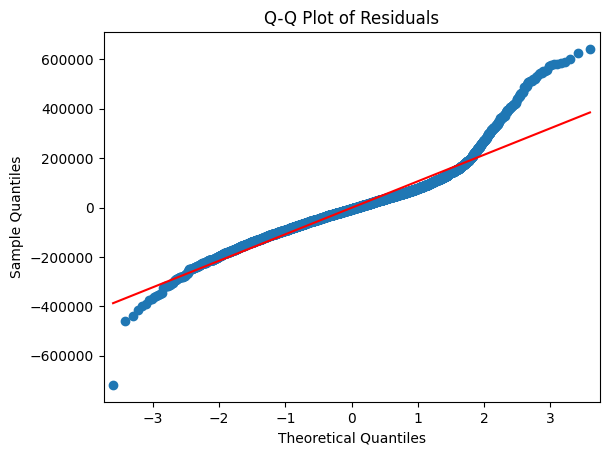

In [421]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Generate Q-Q plot
sm.qqplot(residuals, line='s')

# Set plot title
plt.title("Q-Q Plot of Residuals")

# Display the plot
plt.show()

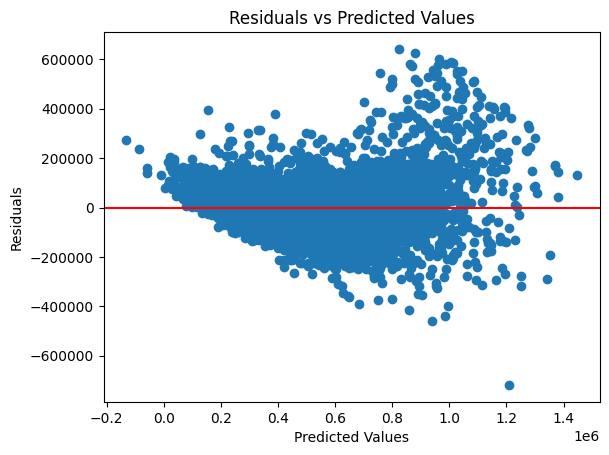

In [422]:

# Calculate the residuals
residuals = y_test - y_pred

# Plot the residuals vs predicted values
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

In [423]:
print(rmse)

107215.10590400454


In [424]:
alphas = [0.1, 0.3, 0.5, 0.75, 1, 5, 10]
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"Lasso Regression (alpha={alpha}): RMSE = {rmse}")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.028e+13, tolerance: 9.823e+10
  model = cd_fast.enet_coordinate_descent(


Lasso Regression (alpha=0.1): RMSE = 107144.34711432102


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.028e+13, tolerance: 9.823e+10
  model = cd_fast.enet_coordinate_descent(


Lasso Regression (alpha=0.3): RMSE = 107144.43090310603


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.029e+13, tolerance: 9.823e+10
  model = cd_fast.enet_coordinate_descent(


Lasso Regression (alpha=0.5): RMSE = 107144.51482780883


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.029e+13, tolerance: 9.823e+10
  model = cd_fast.enet_coordinate_descent(


Lasso Regression (alpha=0.75): RMSE = 107144.61992482128


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.029e+13, tolerance: 9.823e+10
  model = cd_fast.enet_coordinate_descent(


Lasso Regression (alpha=1): RMSE = 107144.72523420404


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.031e+13, tolerance: 9.823e+10
  model = cd_fast.enet_coordinate_descent(


Lasso Regression (alpha=5): RMSE = 107146.43906618845
Lasso Regression (alpha=10): RMSE = 107148.65780529608


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.034e+13, tolerance: 9.823e+10
  model = cd_fast.enet_coordinate_descent(


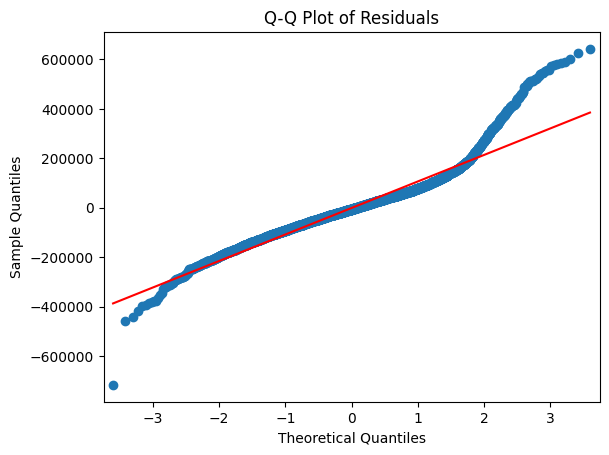

In [425]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Generate Q-Q plot
sm.qqplot(residuals, line='s')

# Set plot title
plt.title("Q-Q Plot of Residuals")

# Display the plot
plt.show()

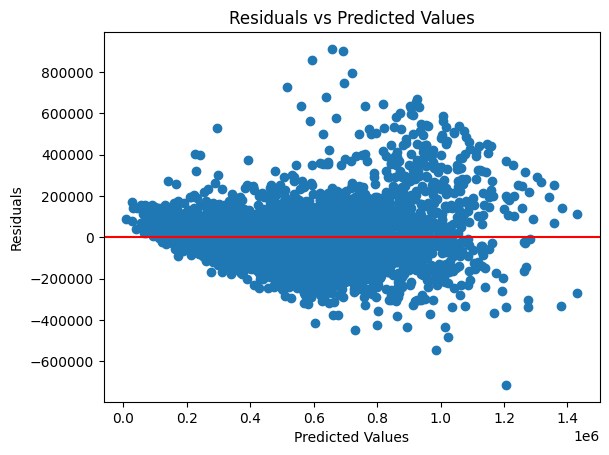

In [429]:
# Calculate the residuals
residuals = y_test - y_pred

# Plot the residuals vs predicted values
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

In [426]:
alphas = [0.1, 0.3, 0.5, 0.75, 1, 5, 10]
for alpha in alphas:
    elastic_net = ElasticNet(alpha=alpha)
    elastic_net.fit(X_train, y_train)
    y_pred = elastic_net.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"Elastic Net Regression (alpha={alpha}): RMSE = {rmse}")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.756e+13, tolerance: 9.823e+10
  model = cd_fast.enet_coordinate_descent(


Elastic Net Regression (alpha=0.1): RMSE = 108403.63467082844


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.058e+13, tolerance: 9.823e+10
  model = cd_fast.enet_coordinate_descent(


Elastic Net Regression (alpha=0.3): RMSE = 109363.88474463552


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.259e+13, tolerance: 9.823e+10
  model = cd_fast.enet_coordinate_descent(


Elastic Net Regression (alpha=0.5): RMSE = 110287.21632714407


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.437e+13, tolerance: 9.823e+10
  model = cd_fast.enet_coordinate_descent(


Elastic Net Regression (alpha=0.75): RMSE = 111310.07535951729


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.566e+13, tolerance: 9.823e+10
  model = cd_fast.enet_coordinate_descent(


Elastic Net Regression (alpha=1): RMSE = 112175.02955376779


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.014e+14, tolerance: 9.823e+10
  model = cd_fast.enet_coordinate_descent(


Elastic Net Regression (alpha=5): RMSE = 117182.6722661466
Elastic Net Regression (alpha=10): RMSE = 118517.99418855924


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.027e+14, tolerance: 9.823e+10
  model = cd_fast.enet_coordinate_descent(


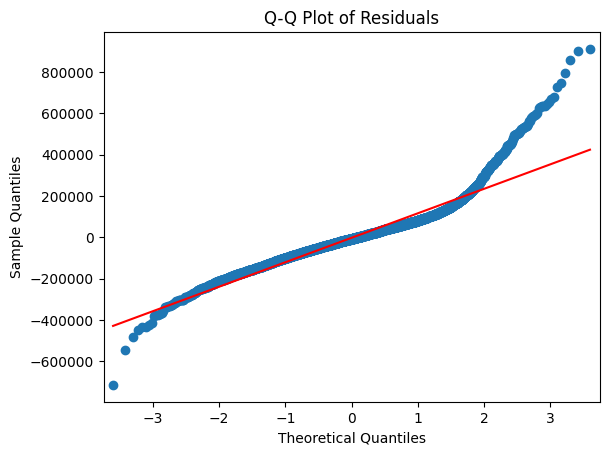

In [428]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Generate Q-Q plot
sm.qqplot(residuals, line='s')

# Set plot title
plt.title("Q-Q Plot of Residuals")

# Display the plot
plt.show()

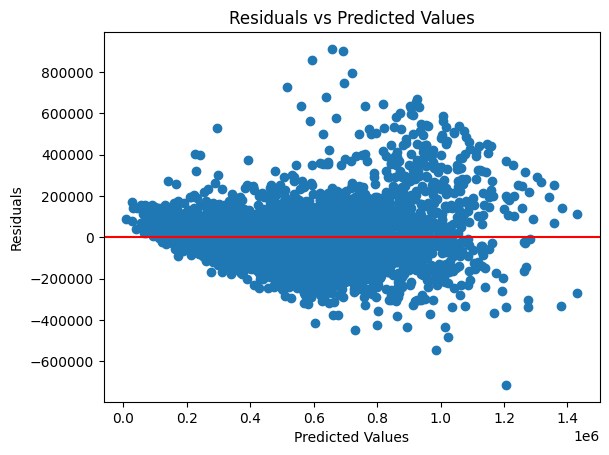

In [430]:
# Calculate the residuals
residuals = y_test - y_pred

# Plot the residuals vs predicted values
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

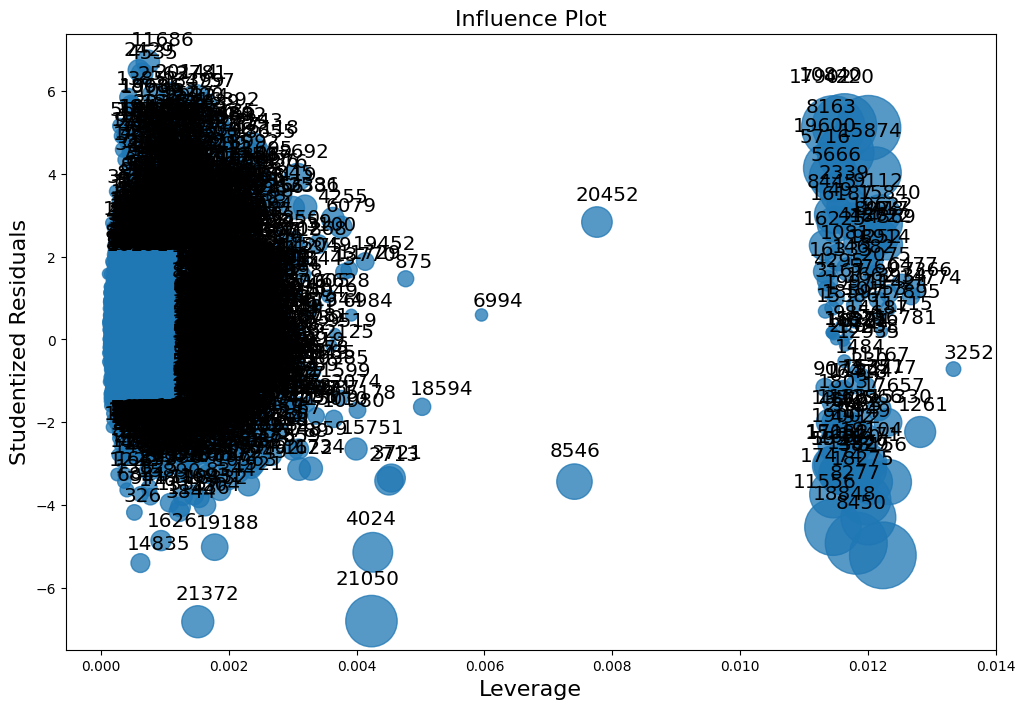

In [434]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [ ]:
'''from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

# Perform PCA
pca = PCA()
df_pca = pca.fit_transform(df_std)

# The transformed data is an array, convert it back into a dataframe
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(len(df.columns))])

# Print the explained variance ratio
print('Explained variance ratio:', pca.explained_variance_ratio_)

# Print the cumulative explained variance ratio
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance ratio:', cumsum_variance)

# Show the first few rows of transformed dataframe
df_pca.head()'''

"from sklearn.decomposition import PCA\nfrom sklearn.preprocessing import StandardScaler\n\n# Standardize the features\nscaler = StandardScaler()\ndf_std = scaler.fit_transform(df)\n\n# Perform PCA\npca = PCA()\ndf_pca = pca.fit_transform(df_std)\n\n# The transformed data is an array, convert it back into a dataframe\ndf_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(len(df.columns))])\n\n# Print the explained variance ratio\nprint('Explained variance ratio:', pca.explained_variance_ratio_)\n\n# Print the cumulative explained variance ratio\ncumsum_variance = np.cumsum(pca.explained_variance_ratio_)\nprint('Cumulative explained variance ratio:', cumsum_variance)\n\n# Show the first few rows of transformed dataframe\ndf_pca.head()"

In [ ]:
'''# Let's do the same, but now let's reduce to 2 components
# Perform PCA
pca = PCA(n_components = 0.90)
df_pca = pca.fit_transform(df_std)

# The transformed data is an array, convert it back into a dataframe
df_pca = pd.DataFrame(df_pca)

# Print the explained variance ratio
print('Explained variance ratio:', pca.explained_variance_ratio_)

# Print the cumulative explained variance ratio
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance ratio:', cumsum_variance)

# Show the first few rows of transformed dataframe
df_pca.head()'''

"# Let's do the same, but now let's reduce to 2 components\n# Perform PCA\npca = PCA(n_components = 0.90)\ndf_pca = pca.fit_transform(df_std)\n\n# The transformed data is an array, convert it back into a dataframe\ndf_pca = pd.DataFrame(df_pca)\n\n# Print the explained variance ratio\nprint('Explained variance ratio:', pca.explained_variance_ratio_)\n\n# Print the cumulative explained variance ratio\ncumsum_variance = np.cumsum(pca.explained_variance_ratio_)\nprint('Cumulative explained variance ratio:', cumsum_variance)\n\n# Show the first few rows of transformed dataframe\ndf_pca.head()"